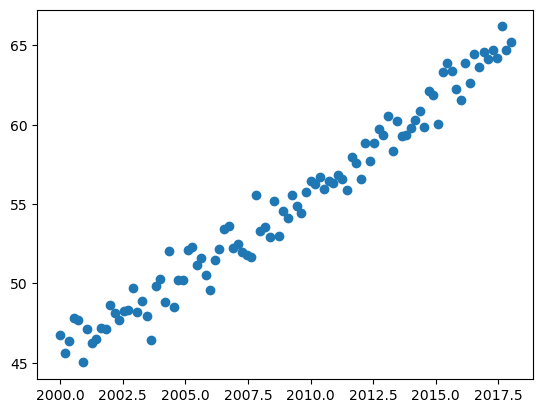

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

np.random.seed(0) # pour que le générateur "aléatoire" soit 
                  # le même pour tout le monde
N = 100
x = np.linspace(2000, 2018, N)
y = np.arange(N)*0.2 + 45 + np.random.normal(size=N)

plt.plot(x, y, 'o');

In [5]:
def fit_function(x, a, b):
    return a*x + b

popt, pcov = curve_fit(fit_function, x, y)


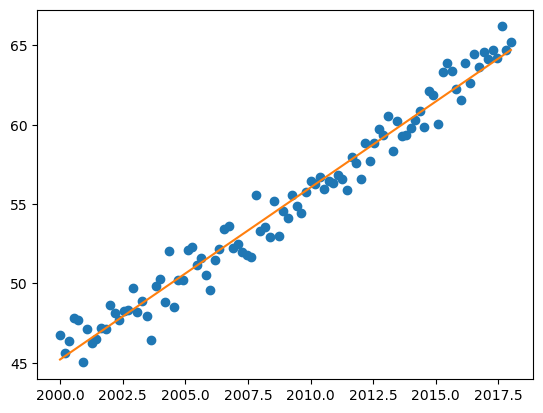

In [7]:
plt.plot(x, y, 'o');
plt.plot(x, fit_function(x, *popt))

In [9]:
np.sqrt(pcov[1,1])

38.82760655348525

In [11]:
# a * x + b
a, b = popt

In [12]:
x_0 = 2010
a*x_0 + b

56.04328983428377

In [15]:
var_a = pcov[0, 0]
var_b = pcov[1, 1]
covar_a_b = pcov[0, 1]
var_y_2010 = var_a * x_0**2 + var_b# + 2*covar_a_b*x_0
print(np.sqrt(var_y_2010))

54.92410215981484


In [18]:
covar_a_b / np.sqrt(var_a*var_b)

-0.999996587616246

In [21]:
sigma = np.sqrt(np.diag(pcov))
sigma

array([1.93267668e-02, 3.88276066e+01])

In [22]:
pcov/sigma[np.newaxis, :]/sigma[:, np.newaxis]

array([[ 1.        , -0.99999659],
       [-0.99999659,  1.        ]])

In [26]:
N = 100
M = 10000
x = np.linspace(2000, 2018, N)

output = []
for i in range(M):
    y = np.arange(N)*0.2 + 45 + np.random.normal(size=N)
    popt, pcov = curve_fit(fit_function, x, y)
    output.append(popt)
    
output = np.array(output)

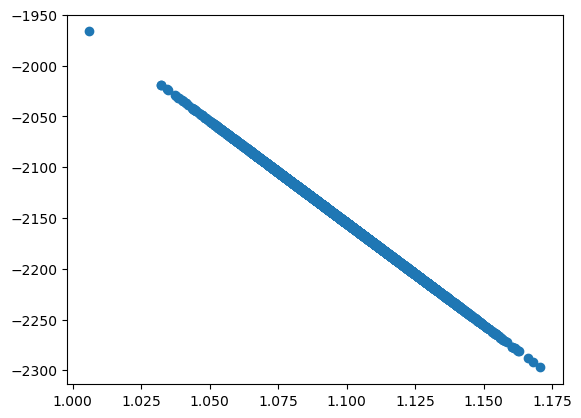

In [27]:
plt.plot(output[:,0], output[:,1], 'o')

In [30]:
np.cov(output.T)

array([[ 3.65771153e-04, -7.34825427e-01],
       [-7.34825427e-01,  1.47625634e+03]])

In [32]:
np.std(output[:,1])

38.420160273625434

In [34]:
pcov

array([[ 3.46184551e-04, -6.95484766e-01],
       [-6.95484766e-01,  1.39723844e+03]])

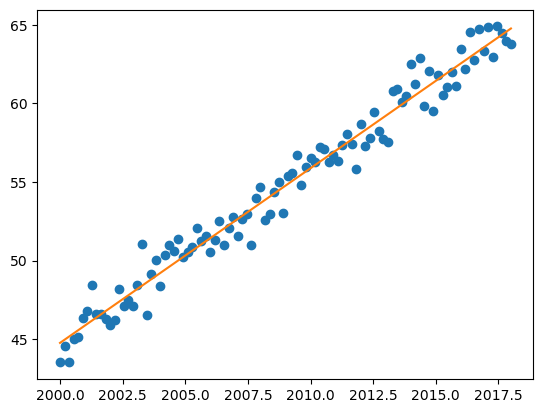

In [49]:
def fit_function(x, a, b):
    return a*(x-2000) + b

popt, pcov = curve_fit(fit_function, x, y)

plt.plot(x, y, 'o');
plt.plot(x, fit_function(x, *popt))

In [50]:
sigma = np.sqrt(np.diag(pcov))

pcov/sigma[np.newaxis, :]/sigma[:, np.newaxis]

array([[ 1.        , -0.86384672],
       [-0.86384672,  1.        ]])

In [51]:
N = 100
M = 1000
x = np.linspace(2000, 2018, N)

output = []
for i in range(M):
    y = np.arange(N)*0.2 + 45 + np.random.normal(size=N)
    popt, pcov = curve_fit(fit_function, x, y)
    output.append(popt)
    
output = np.array(output)

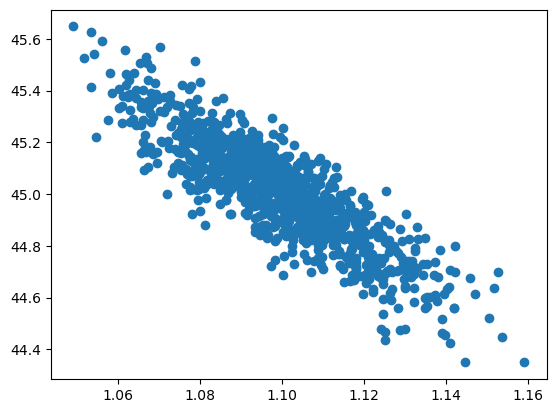

In [52]:
plt.plot(output[:,0], output[:,1], 'o')